# **Stellar Classification**

# **Data Collection and Processing**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 

In [2]:
from google.colab import files
file = files.upload() 
star_df=pd.read_csv("star_classification.csv")

Saving star_classification.csv to star_classification.csv


In [3]:
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  redshift     100000 non-null  float64
 14  plate        100000 non-null  int64  
 15  MJD          100000 non-null  int64  
 16  fiber_ID     100000 non-null  int64  
 17  class        100000 non-null  object 
dtypes: float64(10), int64(7),

In [4]:
star_df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.240000e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783925e+18,0.576661,5137.009660,55588.647500,449.312740
std,3.020047e+06,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324007e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.240000e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,3.000000e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.240000e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.840000e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.240000e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.610000e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.240000e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.330000e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.240000e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.410000e+19,7.011245,12547.000000,58932.000000,1000.000000


In [5]:
star_df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
0,1.240000e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.540000e+18,0.634794,5812,56354,171,GALAXY
1,1.240000e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.180000e+19,0.779136,10445,58158,427,GALAXY
2,1.240000e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.150000e+18,0.644195,4576,55592,299,GALAXY
3,1.240000e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030000e+19,0.932346,9149,58039,775,GALAXY
4,1.240000e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.890000e+18,0.116123,6121,56187,842,GALAXY


# **Data Exploration and Visualization**

**We have removed the columns which are identifiers like obj_ID, spec_obj_ID etc.obj_ID and spec_obj_ID are just identifiers, we will not need them for classification.**

**The features 'run_ID', 'rerun_ID', 'camcol' and 'field_ID' are values which describe parts of the camera when gathering observations, they do not describe caracteristics of the observed object e.g. 'run_ID' represents the corresponding scan which captures the object.**

In [6]:
star_df.drop(columns=['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID'], axis=1, inplace=True)
star_df.head()

,alpha,delta,u,g,r,i,z,redshift,plate,MJD,fiber_ID,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812,56354,171,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445,58158,427,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576,55592,299,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149,58039,775,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,6121,56187,842,GALAXY


**Label encoding has been done as the class values are Galaxy, Star, QSO's which are Categorical and there is a need to convert them into numeric form.**

In [7]:
le = LabelEncoder()
star_df["class"] = le.fit_transform(star_df["class"])
star_df["class"] = star_df["class"].astype(int)

**Using the correlation map below, we can see how the variables are related to each other and also with Class variable.**

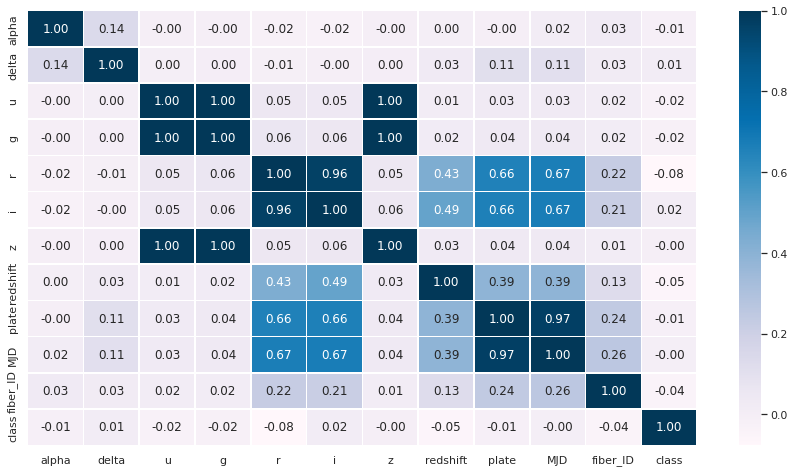

In [8]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(star_df.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f')

**The below graph determines the count of different values in the Class Variable.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


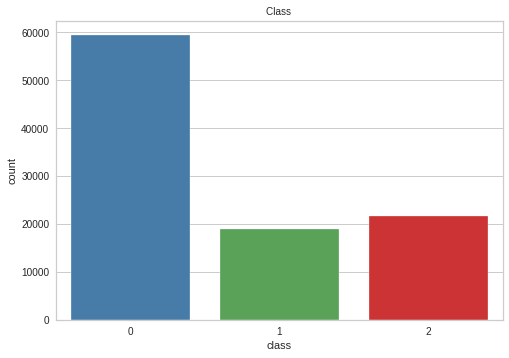

In [59]:
sns.countplot(star_df["class"])
plt.title("Class ",fontsize=10)
plt.show()

**In the above graph it can be seen that there is an imbalance in the dataset as there are more number of records with the value as 0 i.e. GALAXY when compared to other values.**

In order to handle the imbalanced data we have used a method called **Synthetic Minority Oversampling Technique (SMOTE)** is used to eliminate the imbalance between classes.

In [9]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [10]:
x =  star_df.drop("class",axis=1)
y = star_df.loc[:,'class'].values

In [11]:
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 59445, 2: 21594, 1: 18961})
Resampled dataset shape Counter({0: 59445, 1: 59445, 2: 59445})


The below graph shows how balanced the data is now after using **SMOTE.** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


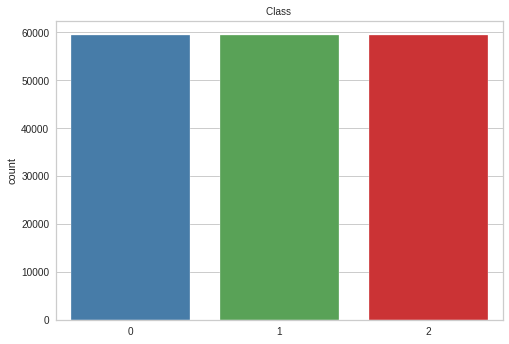

In [61]:
sns.countplot(y)
plt.title("Class ",fontsize=10)
plt.show()

# **Implementation of the different models and Evaluating their performance.**

**We have split the dataset into training set and testing set as 70% and 30%.**

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

**Scaling all values to be within the (0, 1) interval will reduce the distortion due to exceptionally high values and make some algorithms converge faster.**

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns, index=X_test.index)

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import metrics

**First, We have implemented the KNeighbours Classifier. Grid Search Cv was used to loop through predefined hyperparameters and fit the model on the training set.**

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params = {
        'n_neighbors': list(range(1, 10)), 'weights' : ['uniform', 'distance'], 'metric' : ['euclidean', 'manhattan']
    }

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, params, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)

final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

print('CF', confusion_matrix(y_test, final_predictions))

KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')
CF [[13008  2899  1884]
 [  834 16730   216]
 [  948    15 16967]]


**We can see that for n neighbors=4 the model is performing better.**

In [16]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')
y_fit=knn.fit(X_train, y_train)
final_predictions = knn.predict(X_test)

print('CF', confusion_matrix(y_test, final_predictions))

CF [[13008  2899  1884]
 [  834 16730   216]
 [  948    15 16967]]


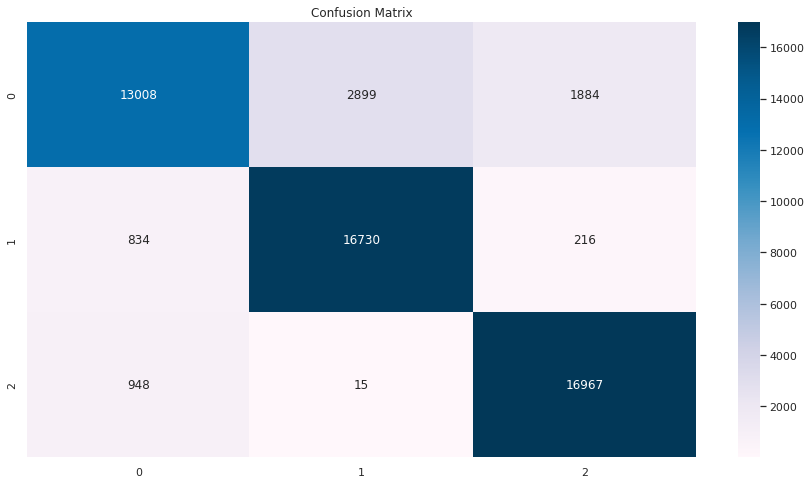

In [17]:
import matplotlib.pyplot as plt

con_metrics = metrics.confusion_matrix(y_test, final_predictions)

sns.heatmap(con_metrics, cmap="PuBu",annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [18]:
print(metrics.classification_report(y_test, final_predictions, digits=3))

              precision    recall  f1-score   support

           0      0.880     0.731     0.799     17791
           1      0.852     0.941     0.894     17780
           2      0.890     0.946     0.917     17930

    accuracy                          0.873     53501
   macro avg      0.874     0.873     0.870     53501
weighted avg      0.874     0.873     0.870     53501



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


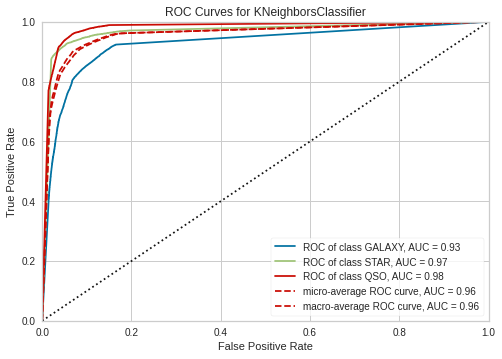

In [19]:
from yellowbrick.classifier import ROCAUC
classes = ['GALAXY','STAR','QSO']
visualizer = ROCAUC(knn, classes=classes)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

**Next we have implemented the random forest classifier and again we have performed grid search cv.**

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30, 100], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10, 30, 100], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestClassifier(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)


final_model_rf = grid_search.best_estimator_
final_predictions_rf = final_model_rf.predict(X_test)

RandomForestClassifier(bootstrap=False, max_features=4, random_state=42)


In [21]:
print('CF', confusion_matrix(y_test, final_predictions_rf))

CF [[10870  6783   138]
 [  797 16982     1]
 [   99     0 17831]]


In [22]:
print(metrics.classification_report(y_test, final_predictions_rf, digits=3))

              precision    recall  f1-score   support

           0      0.924     0.611     0.736     17791
           1      0.715     0.955     0.818     17780
           2      0.992     0.994     0.993     17930

    accuracy                          0.854     53501
   macro avg      0.877     0.854     0.849     53501
weighted avg      0.877     0.854     0.849     53501



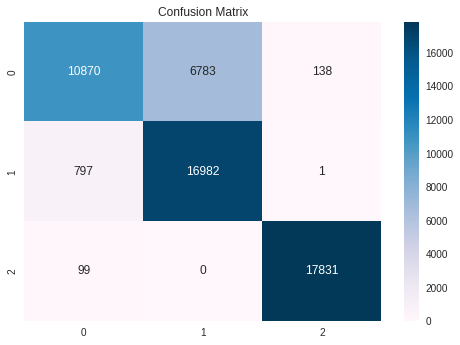

In [23]:
import matplotlib.pyplot as plt

con_metrics = metrics.confusion_matrix(y_test, final_predictions_rf)

sns.heatmap(con_metrics, cmap="PuBu",annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

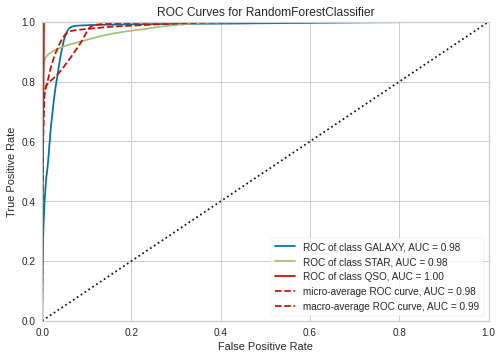

In [24]:
from yellowbrick.classifier import ROCAUC
classes = ['GALAXY','STAR','QSO']
visualizer = ROCAUC(forest_reg, classes=classes)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

**Here we can see that the Random Forest model's accuracy is better than the K Neighbors Classifier.**

**Next, the decision tree classifier has been implemented.**

In [25]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [26]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8169753836376891

**We have pruned the tree with cost complexity as shown below.**

In [27]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas

array([0.00000000e+00, 4.57492862e-06, 5.31931702e-06, 5.33120189e-06,
       5.33326379e-06, 5.33604802e-06, 5.33755731e-06, 5.33845478e-06,
       6.37504570e-06, 6.40729861e-06, 6.40772433e-06, 6.67553177e-06,
       6.83936989e-06, 6.86371140e-06, 6.86626125e-06, 6.96086108e-06,
       7.00930836e-06, 7.00930836e-06, 7.12056722e-06, 7.20957431e-06,
       7.20957431e-06, 7.28239830e-06, 7.28239830e-06, 7.28239830e-06,
       7.28239830e-06, 7.28239830e-06, 7.34308495e-06, 7.34308495e-06,
       7.34308495e-06, 7.39443519e-06, 7.39443519e-06, 7.39443519e-06,
       7.39443519e-06, 7.39443519e-06, 7.39443519e-06, 7.43844969e-06,
       7.43844969e-06, 7.43844969e-06, 7.44650868e-06, 7.45818033e-06,
       7.47659559e-06, 7.47659559e-06, 7.47659559e-06, 7.47659559e-06,
       7.49316998e-06, 7.50997324e-06, 7.50997324e-06, 7.50997324e-06,
       7.52514491e-06, 7.53942412e-06, 7.53942412e-06, 7.53942412e-06,
       7.56560268e-06, 7.56560268e-06, 7.56560268e-06, 7.56560268e-06,
      

In [28]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3285949435465015


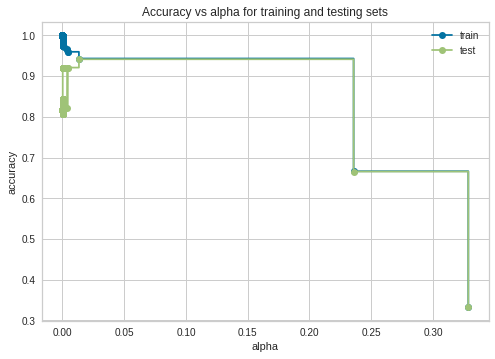

In [29]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

**The tree overfits when ccp_alpha is set to zero besides other parameters being default. This leads**
**to a 100% accuracy on the training set and 98% on testing set. When the alpha keeps increasing,**
**the tree gets pruned more creating a more generalized decision tree. Here the value of 0.015 for**
**alpha maximizes the testing accuracy.**

In [31]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0150)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.015, random_state=0)

In [32]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9414403469094036

[Text(0.4, 0.8333333333333334, 'X[7] <= -0.805\ngini = 0.667\nsamples = 124834\nvalue = [41654, 41665, 41515]'),
 Text(0.2, 0.5, 'gini = 0.017\nsamples = 41882\nvalue = [366, 1, 41515]'),
 Text(0.6, 0.5, 'X[7] <= 0.219\ngini = 0.5\nsamples = 82952\nvalue = [41288, 41664, 0]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.21\nsamples = 45423\nvalue = [39997, 5426, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.066\nsamples = 37529\nvalue = [1291, 36238, 0]')]

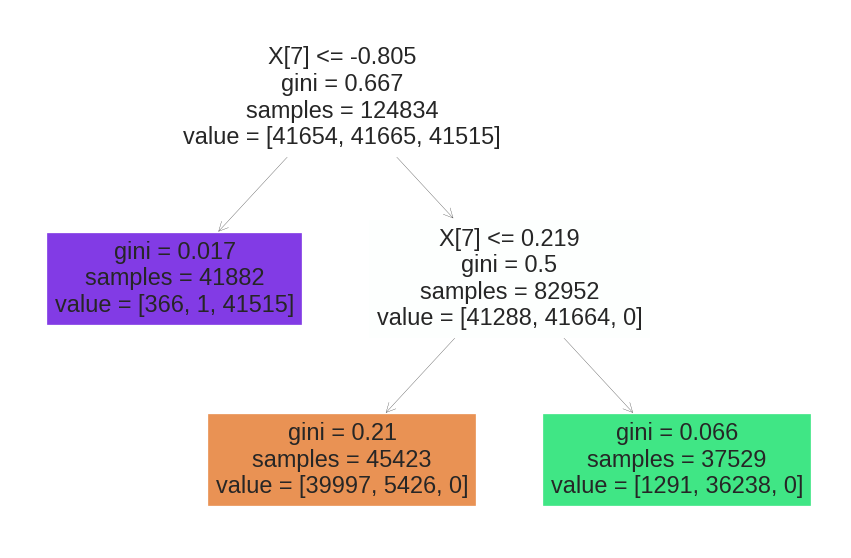

In [33]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

**Now we have tried implementing the grid search cv method to get the hyperparameters that would help attain a greater accuracy.**

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

tree_para = {'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7],
            'max_leaf_nodes': list(range(2, 15))}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, tree_para, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)

final_model_dt = grid_search.best_estimator_
final_predictions_dt = final_model_dt.predict(X_test)

print('CF', confusion_matrix(y_test, final_predictions_dt))

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=14)
CF [[14147  3506   138]
 [  991 16788     1]
 [   97     0 17833]]


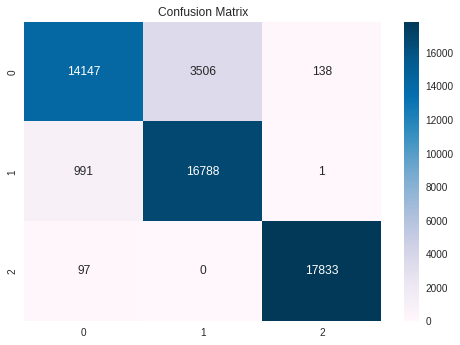

In [54]:
con_metrics = metrics.confusion_matrix(y_test, final_predictions_dt)

sns.heatmap(con_metrics,cmap="PuBu", annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, final_predictions_dt)

0.9115343638436665

[Text(0.5972222222222222, 0.9375, 'X[7] <= -0.805\nentropy = 1.585\nsamples = 124834\nvalue = [41654, 41665, 41515]'),
 Text(0.5416666666666666, 0.8125, 'entropy = 0.073\nsamples = 41882\nvalue = [366, 1, 41515]'),
 Text(0.6527777777777778, 0.8125, 'X[7] <= 0.224\nentropy = 1.0\nsamples = 82952\nvalue = [41288, 41664, 0]'),
 Text(0.4722222222222222, 0.6875, 'X[7] <= -0.084\nentropy = 0.531\nsamples = 45541\nvalue = [40046, 5495, 0]'),
 Text(0.2777777777777778, 0.5625, 'X[8] <= 0.614\nentropy = 0.343\nsamples = 35830\nvalue = [33539, 2291, 0]'),
 Text(0.16666666666666666, 0.4375, 'X[2] <= 0.149\nentropy = 0.273\nsamples = 32635\nvalue = [31106, 1529, 0]'),
 Text(0.1111111111111111, 0.3125, 'X[7] <= -0.47\nentropy = 0.403\nsamples = 14846\nvalue = [13654, 1192, 0]'),
 Text(0.05555555555555555, 0.1875, 'entropy = 0.175\nsamples = 12759\nvalue = [12425, 334, 0]'),
 Text(0.16666666666666666, 0.1875, 'X[2] <= -0.418\nentropy = 0.977\nsamples = 2087\nvalue = [1229, 858, 0]'),
 Text(0.11111111

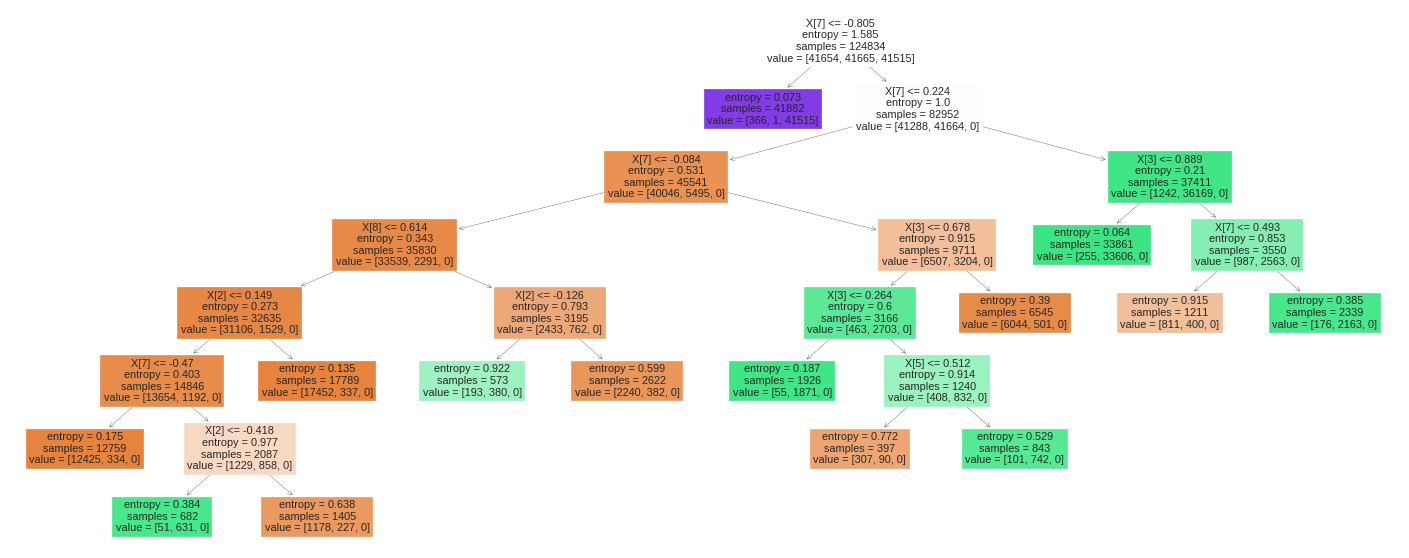

In [56]:
from sklearn import tree
plt.figure(figsize=(25,10))
tree.plot_tree(dt,filled=True)

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, final_predictions_dt))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     17791
           1       0.83      0.94      0.88     17780
           2       0.99      0.99      0.99     17930

    accuracy                           0.91     53501
   macro avg       0.92      0.91      0.91     53501
weighted avg       0.92      0.91      0.91     53501



Lastly, We have implemented the svm model.

In [44]:
from sklearn import svm
svm_clf = svm.SVC(kernel='rbf', C=1, random_state=0)
svm_clf.fit(X_train,y_train)
predicted = svm_clf.predict(X_test)
score = svm_clf.score(X_test, y_test)
svm_score_ = np.mean(score)

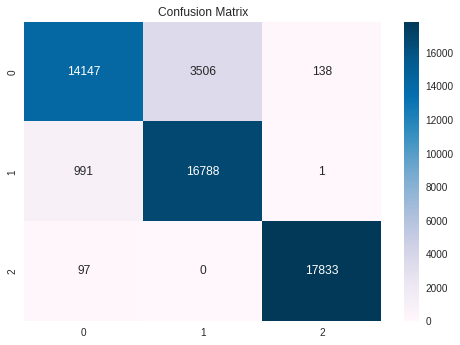

In [55]:
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_test, predicted)
sns.heatmap(con_metrics,cmap="PuBu", annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.95      0.64      0.76     17791
           1       0.85      0.96      0.90     17780
           2       0.84      1.00      0.91     17930

    accuracy                           0.87     53501
   macro avg       0.88      0.87      0.86     53501
weighted avg       0.88      0.87      0.86     53501



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


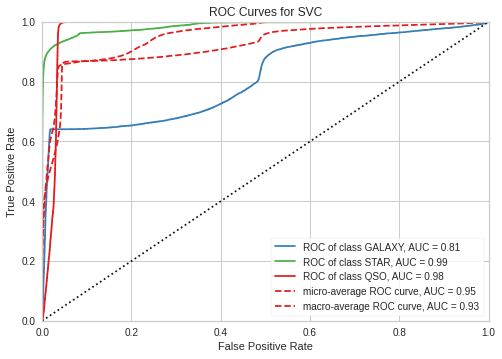

In [53]:
from yellowbrick.style import set_palette

visualizer = ROCAUC(svm_clf, classes=classes)

set_palette('bold')

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

Among all the models, We see that the **Random Forest model** has performed better than the other models with a higher accuracy.

In [70]:
feature_scores = pd.Series(forest_reg.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

redshift    0.634752
z           0.073958
g           0.060496
i           0.059035
u           0.056930
r           0.039040
plate       0.032640
MJD         0.023263
delta       0.007767
alpha       0.006838
fiber_ID    0.005279
dtype: float64

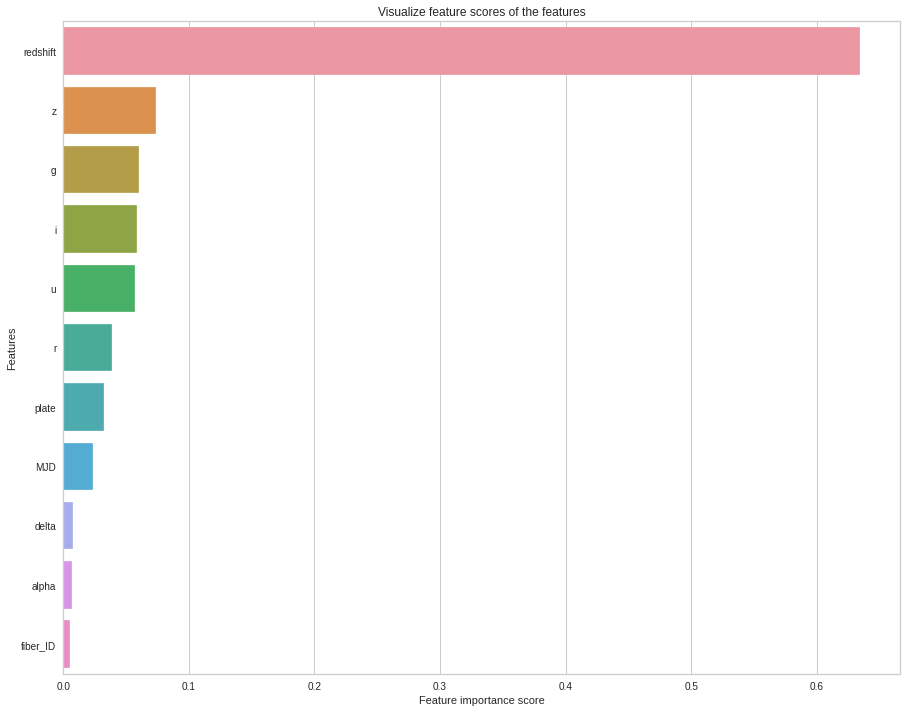

In [74]:
f, ax = plt.subplots(figsize=(15, 12))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

We can see that the **Redshift** feature has the highest importance and the **fiber_ID** has the least importance.